In [171]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import statistics

import statsmodels.formula.api as smf

In [52]:
df = pd.read_excel("housing.xlsx")
df.head()

,Sale Date,Sale Price,sale_reason,sale_instrument,sale_warning,sitetype,addr_full,zip5,ctyname,postalctyn,...,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot,prop_type,present_use
0,2006-01-03,698000,1,3,NaN,R1,17021 NE 113TH CT,98052,REDMOND,REDMOND,...,4,2,1,0,2003,0,R4,6635,R,2
1,2006-01-03,649990,1,3,NaN,R1,11927 178TH PL NE,98052,REDMOND,REDMOND,...,4,2,0,1,2006,0,R4,5570,R,2
2,2006-01-03,572500,1,3,NaN,R1,13315 174TH AVE NE,98052,NaN,REDMOND,...,4,1,1,1,1987,0,R6,8444,R,2
3,2006-01-03,420000,1,3,NaN,R1,3303 178TH AVE NE,98052,REDMOND,REDMOND,...,3,1,0,1,1968,0,R4,9600,R,2
4,2006-01-03,369900,1,3,15,R1,16126 NE 108TH CT,98052,REDMOND,REDMOND,...,3,1,0,1,1980,0,R6,7526,R,2


In [54]:
df['salePrice'] = df['Sale Price']
df['sqftliving'] = df['square_feet_total_living']
df['sqftlot'] = df['sq_ft_lot']
df['number_bedrooms'] = df['bedrooms']
df['zipcode'] = df['zip5']
df['YearBuilt'] = df['year_built']
df.describe()

,Sale Price,sale_reason,sale_instrument,zip5,lon,lat,building_grade,square_feet_total_living,bedrooms,bath_full_count,...,year_built,year_renovated,sq_ft_lot,present_use,salePrice,sqftliving,sqftlot,number_bedrooms,zipcode,YearBuilt
count,1.286500e+04,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,12865.000000,...,12865.000000,12865.000000,1.286500e+04,12865.000000,1.286500e+04,12865.000000,1.286500e+04,12865.000000,12865.000000,12865.000000
mean,6.607377e+05,1.550019,3.677730,98052.540381,-122.079216,47.683576,8.240420,2539.506180,3.478663,1.798445,...,1993.002643,26.244306,2.222857e+04,6.597746,6.607377e+05,2539.506180,2.222857e+04,3.478663,98052.540381,1993.002643
std,4.043811e+05,2.675205,3.310712,1.695107,0.052210,0.025770,1.092624,989.817562,0.876127,0.650797,...,17.220168,227.482581,5.693329e+04,30.211924,4.043811e+05,989.817562,5.693329e+04,0.876127,1.695107,17.220168
min,6.980000e+02,0.000000,0.000000,98052.000000,-122.164280,47.456347,2.000000,240.000000,0.000000,0.000000,...,1900.000000,0.000000,7.850000e+02,0.000000,6.980000e+02,240.000000,7.850000e+02,0.000000,98052.000000,1900.000000
25%,4.600000e+05,1.000000,3.000000,98052.000000,-122.119726,47.665614,8.000000,1820.000000,3.000000,1.000000,...,1979.000000,0.000000,5.355000e+03,2.000000,4.600000e+05,1820.000000,5.355000e+03,3.000000,98052.000000,1979.000000
50%,5.930000e+05,1.000000,3.000000,98052.000000,-122.100252,47.687425,8.000000,2420.000000,4.000000,2.000000,...,1998.000000,0.000000,7.965000e+03,2.000000,5.930000e+05,2420.000000,7.965000e+03,4.000000,98052.000000,1998.000000
75%,7.500000e+05,1.000000,3.000000,98053.000000,-122.026293,47.704956,9.000000,3110.000000,4.000000,2.000000,...,2007.000000,0.000000,1.263200e+04,2.000000,7.500000e+05,3110.000000,1.263200e+04,4.000000,98053.000000,2007.000000
max,4.400000e+06,19.000000,27.000000,98074.000000,-121.949858,47.732546,13.000000,13540.000000,11.000000,23.000000,...,2016.000000,2016.000000,1.631322e+06,300.000000,4.400000e+06,13540.000000,1.631322e+06,11.000000,98074.000000,2016.000000


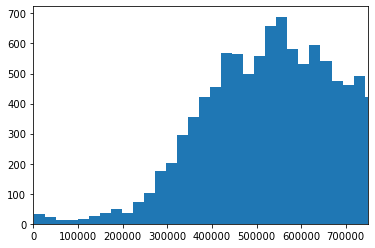

In [93]:
#Histogram of Sale Price, used matplotlib due to issues with thinkstats on this one

plt.hist(df.salePrice, bins='auto')
plt.xlim(0,750000)
plt.show()

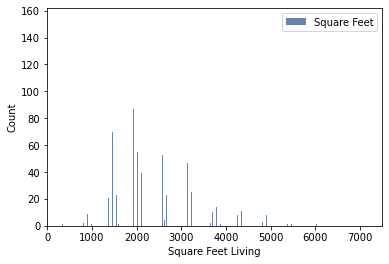

In [187]:
#Histogram for Square Feet living area variable
hist_living=thinkstats2.Hist(df.sqftliving, label="Square Feet")
thinkplot.Hist(hist_living)
thinkplot.Config(xlabel='Square Feet Living', ylabel='Count', xlim=(0,7500))

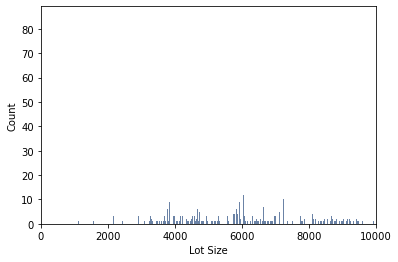

In [63]:
#Histogram of Lot size
hist_lot=thinkstats2.Hist(df.sqftlot)
thinkplot.Hist(hist_lot)
thinkplot.Config(xlabel="Lot Size", ylabel="Count", xlim=(0,10000))

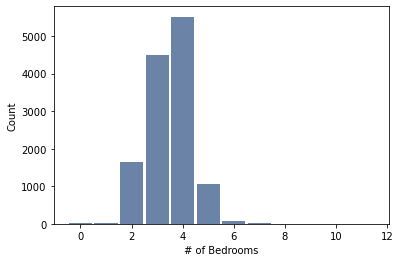

In [65]:
#Histogram of Bedrooms
hist_bed = thinkstats2.Hist(df.number_bedrooms)
thinkplot.Hist(hist_bed)
thinkplot.Config(xlabel='# of Bedrooms', ylabel='Count')

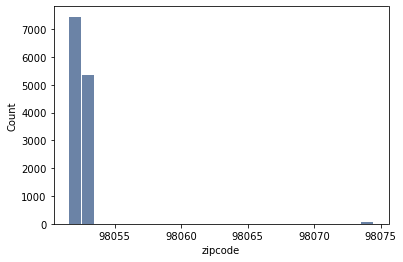

In [97]:
#Histogram of Zip
hist_zip = thinkstats2.Hist(df.zipcode)
thinkplot.Hist(hist_zip)
thinkplot.Config(xlabel='zipcode', ylabel='Count')

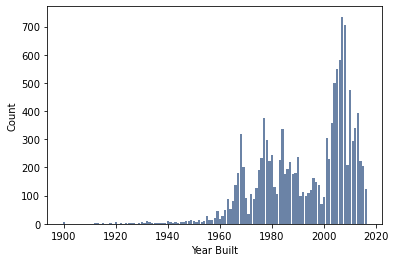

In [72]:
#Histogram of Year Built
hist_year = thinkstats2.Hist(df.YearBuilt)
thinkplot.Hist(hist_year)
thinkplot.Config(xlabel='Year Built', ylabel="Count")

In [108]:
print('Mean Sale Price:', statistics.mean(df.salePrice))
print('Median Sale Price:', statistics.median(df.salePrice))
print('Mean Sq Ft Living:', statistics.mean(df.sqftliving))
print('Median Sq Ft Living:', statistics.median(df.sqftliving))
print('Mean Sq Ft Lot:', statistics.mean(df.sqftlot))
print('Median Sq Ft Lot:', statistics.median(df.sqftlot))
print('Mean # of Bedrooms:', statistics.mean(df.number_bedrooms))
print('Median # of Bedrooms:', statistics.median(df.number_bedrooms))

Mean Sale Price: 660737.7496307812
Median Sale Price: 593000
Mean Sq Ft Living: 2539.5061795569372
Median Sq Ft Living: 2420
Mean Sq Ft Lot: 22228.568208317138
Median Sq Ft Lot: 7965
Mean # of Bedrooms: 3.478663039253789
Median # of Bedrooms: 4


In [130]:
bedrooms = df.number_bedrooms
big_house = bedrooms[bedrooms > 2]
little_house = bedrooms[bedrooms <= 2]

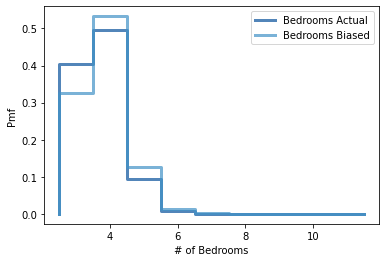

In [133]:
actual_pmf = thinkstats2.Pmf(big_house, label='Bedrooms Actual')
thinkplot.Config(xlabel='Sq Ft Living Actual', ylabel='PMF')

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(actual_pmf, label='Bedrooms Biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Config(xlabel='# of Bedrooms', ylabel="Pmf")

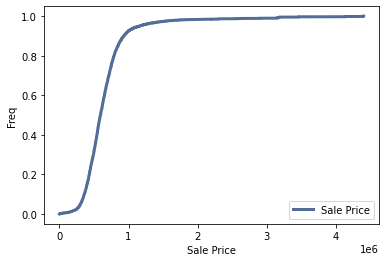

In [112]:
salePrice_cdf = thinkstats2.Cdf(salePrice, label='Sale Price')
thinkplot.Cdf(salePrice_cdf)
thinkplot.Config(xlabel='Sale Price', ylabel='Freq')

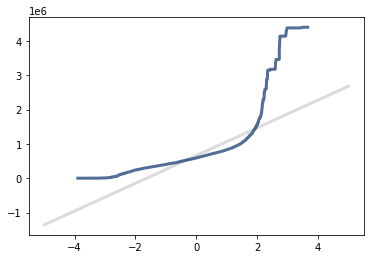

In [143]:
salePrice = df.salePrice

def MakeNormalPlot(weights):
    mean= weights.mean()
    std = weights.std()

    xs = [-5,5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')
    
MakeNormalPlot(salePrice)

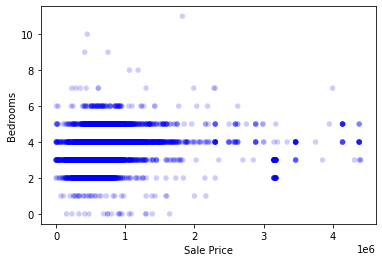

In [146]:
thinkplot.Scatter(salePrice, bedrooms)
thinkplot.Config(xlabel="Sale Price", ylabel='Bedrooms')

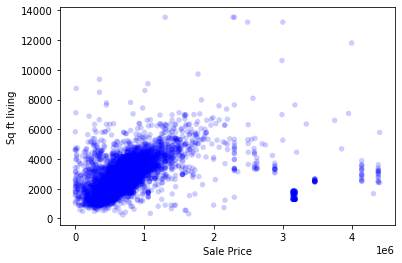

In [147]:
sqftliving = df.sqftliving
thinkplot.Scatter(salePrice, sqftliving)
thinkplot.Config(xlabel='Sale Price', ylabel='Sq ft living')

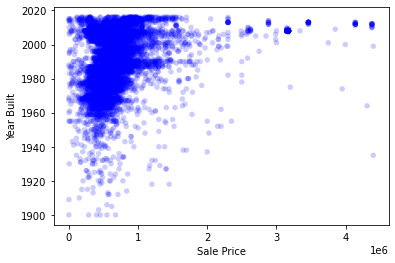

In [186]:
yearbuilt = df.YearBuilt
thinkplot.Scatter(salePrice, yearbuilt)
thinkplot.Config(xlabel='Sale Price', ylabel='Year Built')

In [148]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [150]:
np.corrcoef(salePrice, sqftliving)

array([[1.        , 0.45458758],
       [0.45458758, 1.        ]])

In [151]:
np.corrcoef(salePrice, bedrooms)

array([[1.        , 0.22546748],
       [0.22546748, 1.        ]])

In [153]:
Corr(salePrice, sqftliving)

0.4545875847238298

In [156]:
Corr(salePrice, bedrooms)

0.22546747811642293

In [154]:
SpearmanCorr(salePrice, sqftliving)

0.7068785053389812

In [155]:
SpearmanCorr(salePrice, bedrooms)

0.40522637639770565

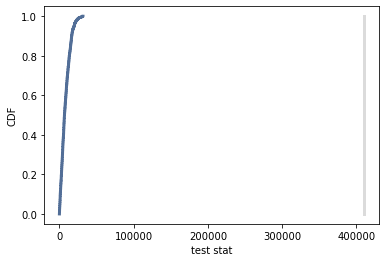

<Figure size 576x432 with 0 Axes>

In [180]:
# Difference in Means Hypothesis Test

cheaper_house = salePrice[salePrice > 400000]
expensive_house = salePrice[salePrice <= 400000]

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

data = cheaper_house, expensive_house
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
ht.PlotCdf()
thinkplot.Show(xlabel='test stat', ylabel='CDF')

In [184]:
big_house_bedroom_price = big_house * salePrice
small_house_bedroom_price = little_house * salePrice
print('Small Bedrooms Mean Price:', small_house_bedroom_price.mean(),"Big Bedrooms Mean Price:", big_house_bedroom_price.mean())

living = df.sqftliving
big_living = living[living > 2500]
small_living = living[living <= 2500]

big_living_price = big_living*salePrice
small_living_price = small_living*salePrice
print('Small Living Mean Price:', small_living_price.mean(),'Big Living Mean Price:', big_living_price.mean())

lot = df.sqftlot
big_lot = lot[lot > 10000]
small_lot = lot[lot <= 10000]

big_lot_price = big_lot * salePrice
small_lot_price = small_lot * salePrice
print('Small Lot Mean Price:', small_lot_price.mean(),'Big Lot Mean Price:', big_lot_price.mean())

Small Bedrooms Mean Price: 1070698.9988304093 Big Bedrooms Mean Price: 2578815.481398476
Small Living Mean Price: 997191947.1296216 Big Living Mean Price: 2873855491.754312
Small Lot Mean Price: 4001827228.25644 Big Lot Mean Price: 43990765953.977806


In [178]:
#Regression 

model = smf.ols ('salePrice ~ sqftliving + bedrooms + sqftlot', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salePrice   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:13:47   Log-Likelihood:            -1.8284e+05
No. Observations:               12865   AIC:                         3.657e+05
Df Residuals:                   12861   BIC:                         3.657e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.431e+05    1.3e+04     18.642      0.000    2.18e+05    2.69e+05
sqftliving   197.2204      4.050     48.694      0.000     189.282     205.159
bedrooms   -2.433e+04   4453.533     -5.463      0.000   -3.31e+04   -1.56e+04
sqftlot        0.0660      0.058      1.144      0.253      -0.047       0.179
==============================================================================
Omnibus:                    14193.655   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1186076.759
Skew:                           5.724   Prob(JB):                         0.00
Kurtosis:                      48.625   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""